#Pertemuan ke -6 (Clustering)
Nama : Rahmaliyah Kadir

Nim : H071201093

#**CLUSSTERING**
Pengelompokan data yang tidak berlabel dapat dilakukan dengan modul sklearn.cluster.

Setiap algoritme pengelompokan hadir dalam dua varian: sebuah kelas, yang mengimplementasikan metode fit untuk mempelajari kluster pada data latih, dan sebuah fungsi, yang, mengingat data latih, mengembalikan larik label bilangan bulat yang sesuai dengan klaster yang berbeda. Untuk kelas, label di atas data pelatihan dapat ditemukan di labels_atribut.

**Input data**

Satu hal penting yang perlu diperhatikan adalah bahwa algoritma yang diimplementasikan dalam modul ini dapat menggunakan berbagai jenis matriks sebagai masukan. Semua metode menerima matriks data bentuk standar (n_samples, n_features). Ini dapat diperoleh dari kelas dalam modul sklearn.feature_extraction. Untuk AffinityPropagation, SpectralClustering dan DBSCAN seseorang juga dapat memasukkan matriks kesamaan bentuk (n_samples, n_samples). Ini dapat diperoleh dari fungsi dalam modul sklearn.metrics.pairwise.

#**K-means**
Algoritma KMeans mengelompokkan data dengan mencoba memisahkan sampel dalam n kelompok dengan varians yang sama, meminimalkan kriteria yang dikenal sebagai inersia atau jumlah kuadrat dalam-cluster (lihat di bawah). Algoritma ini membutuhkan jumlah cluster yang akan ditentukan. Ini menskala dengan baik untuk sampel dalam jumlah besar dan telah digunakan di berbagai area aplikasi di berbagai bidang.

Inersia dapat dikenali sebagai ukuran seberapa koheren cluster secara internal. Itu menderita berbagai kelemahan:
- Inersia membuat asumsi bahwa cluster cembung dan isotropik, yang tidak selalu demikian. Ini merespon buruk terhadap kelompok memanjang, atau manifold dengan bentuk tidak beraturan.
- Inersia bukanlah metrik yang dinormalisasi: kita hanya tahu bahwa nilai yang lebih rendah lebih baik dan nol lebih optimal. Tapi di ruang berdimensi sangat tinggi, jarak Euclidean cenderung membengkak (ini adalah contoh dari apa yang disebut "kutukan dimensi"). Menjalankan algoritma reduksi dimensi seperti analisis komponen utama (PCA) sebelum pengelompokan k-means dapat mengatasi masalah ini dan mempercepat komputasi.

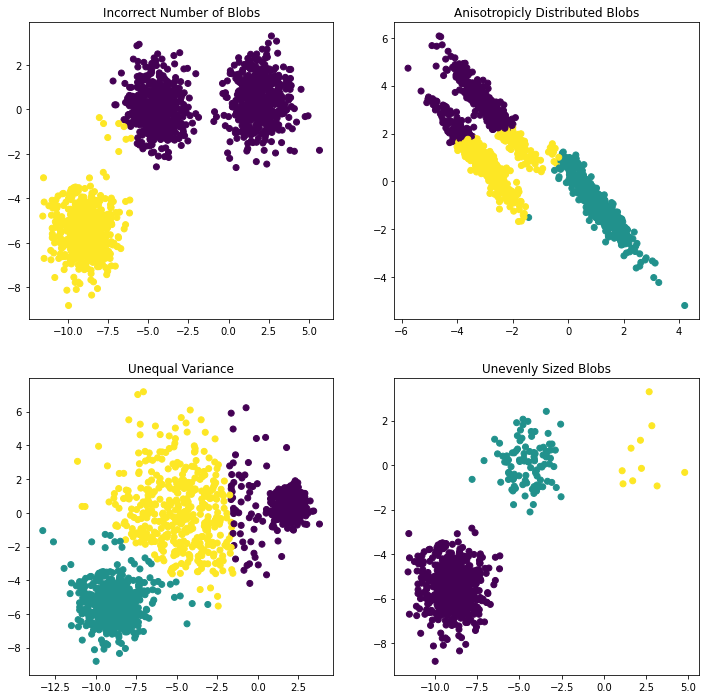

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

#**Mini Batch K-Means**
Mini Batch KMeans adalah varian dari algoritma KMeans yang menggunakan mini-batch untuk mengurangi waktu komputasi, sambil tetap berusaha mengoptimalkan fungsi tujuan yang sama. Mini-batch adalah himpunan bagian dari data input, yang diambil sampelnya secara acak di setiap iterasi pelatihan. Mini-batch ini secara drastis mengurangi jumlah perhitungan yang diperlukan untuk konvergen ke solusi lokal. Berbeda dengan algoritma lain yang mengurangi waktu konvergensi k-means, k-means mini-batch menghasilkan hasil yang umumnya hanya sedikit lebih buruk dari algoritma standar.

In [61]:
from sklearn.datasets import make_blobs

np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

In [62]:
import time
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [63]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=3,
    batch_size=batch_size,
    n_init=10,
    max_no_improvement=10,
    verbose=0,
)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

In [64]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_, mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)

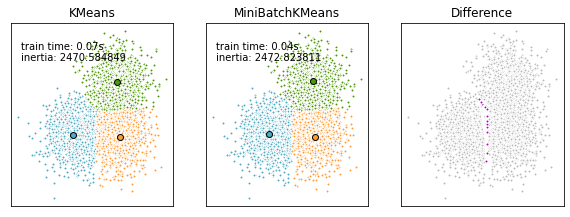

In [65]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_mini_batch, mbk.inertia_))

# Initialize the different array to all False
different = mbk_means_labels == 4
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += (k_means_labels == k) != (mbk_means_labels == k)

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], "w", markerfacecolor="#bbbbbb", marker=".")
ax.plot(X[different, 0], X[different, 1], "w", markerfacecolor="m", marker=".")
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()

#**Affinity Propagation**
Affinity Propagation membuat cluster dengan mengirimkan pesan antar pasangan sampel hingga konvergensi. Dataset kemudian dideskripsikan menggunakan sejumlah kecil contoh, yang diidentifikasi sebagai yang paling representatif dari sampel lainnya. Pesan yang dikirim antar pasangan mewakili kesesuaian satu sampel untuk menjadi contoh sampel lainnya, yang diperbarui sebagai respons terhadap nilai dari pasangan lainnya. Pemutakhiran ini terjadi secara iteratif hingga konvergensi, di mana contoh akhir dipilih, dan karenanya pengelompokan akhir diberikan.

In [66]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [67]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [68]:
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, 
      labels))
print("Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean"))

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


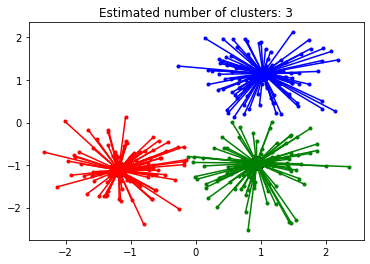

In [69]:
from itertools import cycle

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

#**Mean Shift**
Pengelompokan MeanShift bertujuan untuk menemukan gumpalan dalam kepadatan sampel yang halus. Ini adalah algoritma berbasis centroid, yang bekerja dengan memperbarui kandidat centroid menjadi rata-rata titik dalam wilayah tertentu. Kandidat-kandidat ini kemudian disaring dalam tahap pasca-pemrosesan untuk mengeliminasi duplikat yang hampir sama untuk membentuk set centroid terakhir.

In [70]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [71]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# TBandwidth berikut dapat dideteksi secara otomatis menggunakan
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


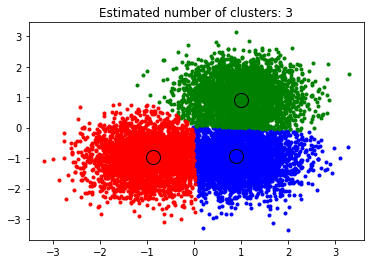

In [72]:
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

#**Spectral clustering**
SpectralClustering melakukan penyematan matriks afinitas berdimensi rendah di antara sampel, diikuti dengan pengelompokan, misalnya dengan KMeans, komponen vektor eigen dalam ruang berdimensi rendah. Ini sangat efisien secara komputasi jika matriks afinitas jarang dan pemecah amg digunakan untuk masalah nilai eigen (Catatan, pemecah amg mengharuskan modul pyamg diinstal.)

In [73]:
l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

In [74]:
img = circle1 + circle2 + circle3 + circle4

# Kami menggunakan topeng yang membatasi latar depan: masalah kami
# Yang menarik disini bukan memisahkan objek dari background,
# tetapi memisahkan mereka satu dari yang lain.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

In [75]:
from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)

In [76]:
graph.data = np.exp(-graph.data / graph.data.std())

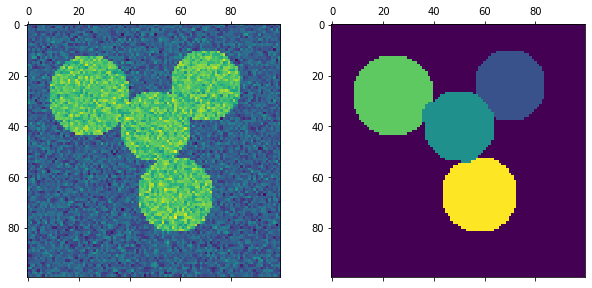

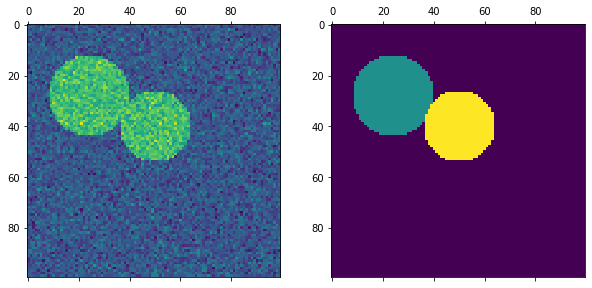

In [77]:
from sklearn.cluster import spectral_clustering
import matplotlib.pyplot as plt

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

#**Hierarchical clustering**
Pengelompokan hierarkis adalah keluarga umum dari algoritma pengelompokan yang membangun cluster bersarang dengan menggabungkan atau memisahkannya secara berurutan. Hierarki cluster ini direpresentasikan sebagai pohon (atau dendrogram). Akar pohon adalah klaster unik yang mengumpulkan semua sampel, daun menjadi klaster dengan hanya satu sampel. Lihat halaman Wikipedia untuk lebih jelasnya.

#**DBSCAN**
Algoritme DBSCAN memandang cluster sebagai area dengan kepadatan tinggi yang dipisahkan oleh area dengan kepadatan rendah. Karena pandangan yang agak umum ini, klaster yang ditemukan oleh DBSCAN dapat berbentuk apa saja, berbeda dengan k-means yang mengasumsikan bahwa klaster berbentuk cembung. Komponen utama DBSCAN adalah konsep sampel inti, yaitu sampel yang berada di area dengan kepadatan tinggi. Oleh karena itu, cluster adalah sekumpulan sampel inti, masing-masing dekat satu sama lain (diukur dengan beberapa ukuran jarak) dan sekumpulan sampel non-inti yang dekat dengan sampel inti (tetapi bukan sampel inti itu sendiri). Ada dua parameter pada algoritme, min_samples dan eps, yang mendefinisikan secara formal apa yang kami maksud saat kami mengatakan padat. min_samples yang lebih tinggi atau eps yang lebih rendah menunjukkan kepadatan yang lebih tinggi yang diperlukan untuk membentuk sebuah cluster.

In [78]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [79]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

In [80]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Jumlah cluster dalam label, abaikan noise jika ada
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


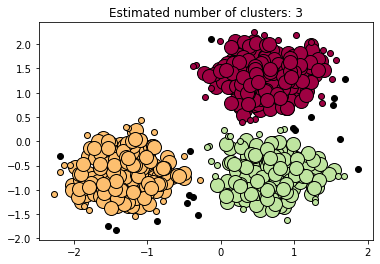

In [81]:
import matplotlib.pyplot as plt

# Hitam dihilangkan dan digunakan untuk kebisingan sebagai gantinya
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Hitam digunakan untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

#**OPTICS**
Algoritma OPTIK berbagi banyak kesamaan dengan algoritma DBSCAN, dan dapat dianggap sebagai generalisasi DBSCAN yang melonggarkan persyaratan eps dari satu nilai ke rentang nilai. Perbedaan utama antara DBSCAN dan OPTICS adalah bahwa algoritme OPTICS membuat grafik keterjangkauan, yang memberikan masing-masing sampel jarak_jangkauan, dan titik dalam atribut pemesanan_ klaster; dua atribut ini ditugaskan ketika model dipasang, dan digunakan untuk menentukan keanggotaan cluster. Jika OPTICS dijalankan dengan nilai default inf yang ditetapkan untuk max_eps, maka ekstraksi cluster gaya DBSCAN dapat dilakukan berulang kali dalam waktu linier untuk setiap nilai eps yang diberikan menggunakan metode cluster_optics_dbscan. Menetapkan max_eps ke nilai yang lebih rendah akan menghasilkan waktu pengoperasian yang lebih singkat, dan dapat dianggap sebagai radius lingkungan maksimum dari setiap titik untuk menemukan titik potensial lain yang dapat dijangkau.

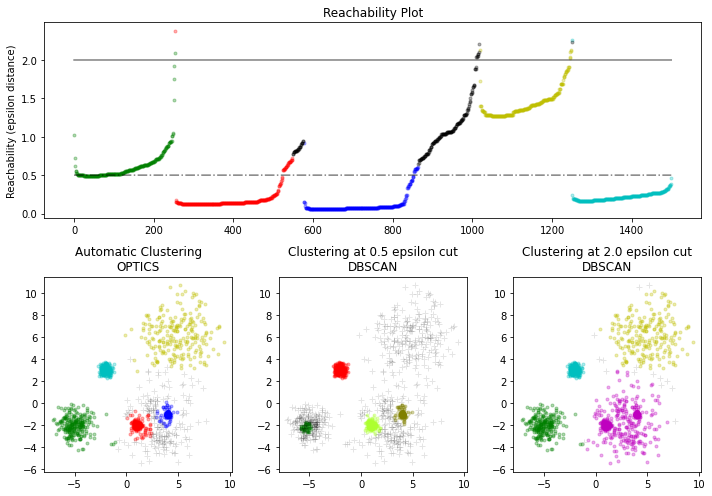

In [82]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec

# Hasilkan data sampel
np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + 0.8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + 0.1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + 0.3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)

# Jalankan fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2,
)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Plot jangkauan
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTIK
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN di 0,5
colors = ["g", "greenyellow", "olive", "r", "b", "c"]
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker=".")
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN di 2
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

#**BIRCH**
Birch membangun sebuah pohon yang disebut Clustering Feature Tree (CFT) untuk data yang diberikan. Data pada dasarnya dikompresi secara lossy ke sekumpulan node Clustering Feature (CF Nodes). Node CF memiliki sejumlah subcluster yang disebut subcluster Fitur Pengelompokan (CF Subclusters) dan Subcluster CF ini yang terletak di Node CF non-terminal dapat memiliki Node CF sebagai anak.

Subcluster CF menyimpan informasi yang diperlukan untuk pengelompokan yang mencegah kebutuhan untuk menyimpan seluruh data masukan dalam memori. Informasi ini meliputi:
- Jumlah sampel dalam subcluster.
- Linear Sum - Sebuah vektor n-dimensi memegang jumlah dari semua sampel
- Kuadrat Jumlah - Jumlah kuadrat norma L2 dari semua sampel.
- Centroids - Untuk menghindari penghitungan ulang linear sum / n_samples.
- Norma kuadrat dari centroid.

**Rand index**

In [83]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.rand_score(labels_true, labels_pred)

0.6666666666666666

In [84]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.24242424242424243

In [85]:
labels_pred = [1, 1, 0, 0, 3, 3]
metrics.rand_score(labels_true, labels_pred)

metrics.adjusted_rand_score(labels_true, labels_pred)

0.24242424242424243

In [86]:
metrics.rand_score(labels_pred, labels_true)

metrics.adjusted_rand_score(labels_pred, labels_true)

0.24242424242424243

In [87]:
labels_pred = labels_true[:]
metrics.rand_score(labels_true, labels_pred)

metrics.adjusted_rand_score(labels_true, labels_pred)

1.0

In [88]:
labels_true = [0, 0, 0, 0, 0, 0, 1, 1]
labels_pred = [0, 1, 2, 3, 4, 5, 5, 6]
metrics.rand_score(labels_true, labels_pred)

metrics.adjusted_rand_score(labels_true, labels_pred)

-0.07207207207207207

#**Clustering performance evaluation**
Mengevaluasi kinerja algoritma pengelompokan tidak semudah menghitung jumlah kesalahan atau ketepatan dan penarikan kembali algoritma klasifikasi yang diawasi. Khususnya metrik evaluasi apa pun tidak boleh memperhitungkan nilai absolut dari label klaster, melainkan jika pengelompokan ini menentukan pemisahan data yang mirip dengan beberapa kumpulan kelas kebenaran dasar atau memenuhi beberapa asumsi sehingga anggota yang termasuk dalam kelas yang sama lebih mirip dari anggota kelas yang berbeda menurut beberapa kesamaan metrik.